In [2]:
%load_ext autoreload
%autoreload 2

import ergast_loader
import plot

import matplotlib.pyplot as plt
import seaborn as sns
import data_tools
import style
import pandas as pd

Driver colors and linestyle is only configured for 2020 so far.

In [3]:
# import refresh_ergast
# refresh_ergast.refresh()
ergast = ergast_loader.ErgastLoader('data//ergast_data')

## delta from target driver

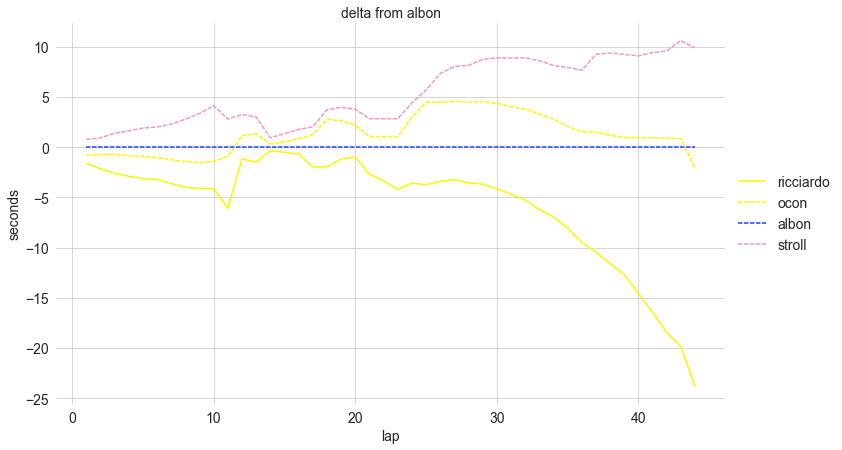

In [4]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 7), 
    tgt_driver='albon',
    driver_refs=['albon', 'ocon', 'stroll', 'ricciardo']
)

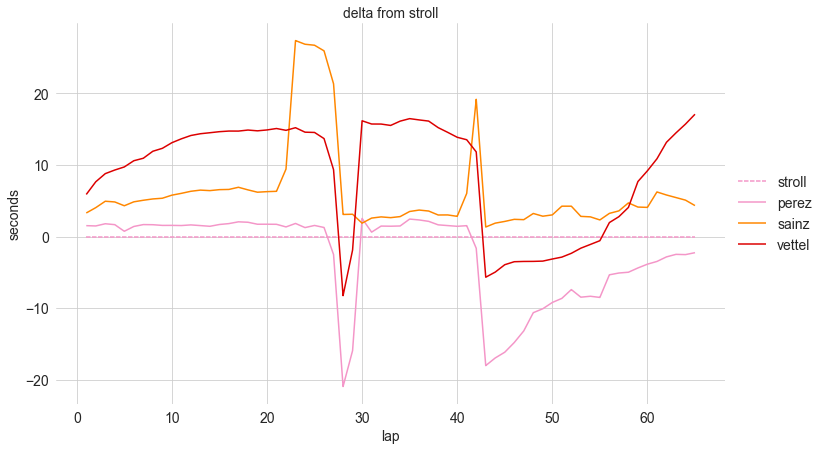

In [5]:
fig, ax = plot.delta_chart(
    ergast, 
    race='2020_spanish_grand_prix', 
    tgt_driver='stroll',
    driver_refs=['stroll', 'perez', 'sainz', 'vettel']
)

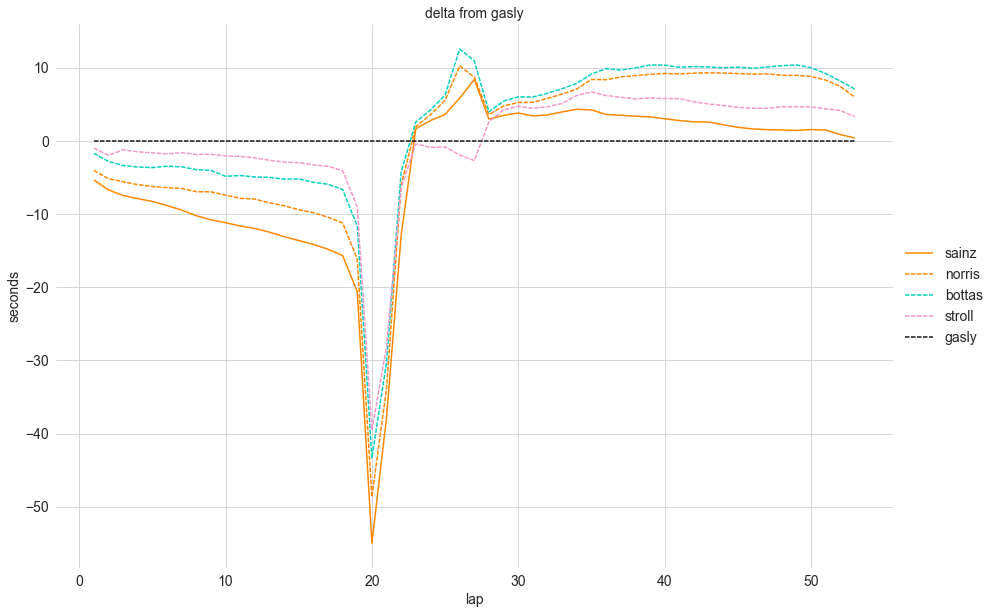

In [6]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 8), 
    tgt_driver='gasly',
    driver_refs=['stroll', 'sainz', 'gasly', 'norris', 'bottas'],
    figsize=(15,10)
)

fig.savefig('deleteme.png', dpi=300, bbox_inches='tight')

# overlay time chart in progress

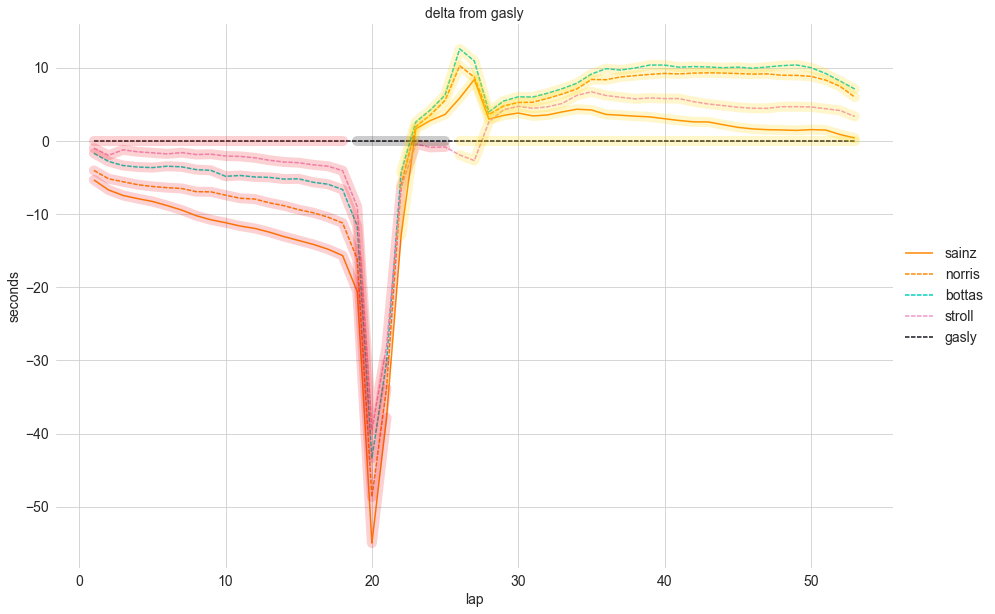

In [9]:
drivers = ['stroll', 'sainz', 'gasly', 'norris', 'bottas']
raceId = data_tools.get_race_id(ergast, (2020, 8))
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 8), 
    tgt_driver='gasly',
    driver_refs=drivers,
    figsize=(15,10)
)
delta_table = data_tools.make_delta_table(
        ergast,
        raceId=raceId,
        tgt_driver='gasly',
        driver_refs=drivers,
)


tr = pd.read_csv('data\\pirelli\\race_tyre_usage_2020.csv')
tr = pd.merge(left=tr, right=ergast.data['races'][['name', 'raceId']], how='left', left_on='race', right_on='name')
tr = pd.merge(left=tr, right=ergast.data['drivers'][['code', 'driverId']], how='left', left_on='driver', right_on='code')
tr = tr[tr['raceId']==1038]
tr.loc[tr['lap']==0, 'lap'] = 1
tr = tr.drop_duplicates()
tr

delta_table = pd.merge(left=delta_table, right=tr[['lap', 'race_assignment', 'raceId', 'driverId']], how='left', on=['lap', 'raceId', 'driverId'])


delta_table = delta_table.sort_values(['driverId', 'lap'])
delta_table['race_assignment'] = delta_table['race_assignment'].fillna(method='ffill')

raceId = data_tools.get_race_id(ergast, (2020, 8))

tyre_colors = {
    'soft':'#ed1c24',
    'medium':'#ffd400',
    'hard':'#000000',
}

for driver in drivers:
    for comp in delta_table.loc[delta_table['driverRef']==driver, 'race_assignment'].unique():
        tmp = delta_table[(delta_table['driverRef']==driver) & (delta_table['race_assignment']== comp)].copy()
        plt.plot(tmp['lap'], tmp['delta_seconds'], alpha=.2, lw=10, color=tyre_colors[comp])

,raceId,driverId,lap,position,time,milliseconds,total_milliseconds,driverRef,delta,delta_seconds,race_assignment
108,1038,822,1,6,1:30.934,90934,90934,bottas,-1674,-1.674,soft
109,1038,822,1,6,1:30.934,90934,90934,bottas,-1674,-1.674,soft
110,1038,822,2,6,1:26.027,86027,176961,bottas,-2786,-2.786,soft
111,1038,822,3,6,1:25.971,85971,262932,bottas,-3351,-3.351,soft
112,1038,822,4,6,1:26.052,86052,348984,bottas,-3554,-3.554,soft
...,...,...,...,...,...,...,...,...,...,...,...
103,1038,846,49,4,1:24.329,84329,6095014,norris,8973,8.973,medium
104,1038,846,50,4,1:24.232,84232,6179246,norris,8838,8.838,medium
105,1038,846,51,4,1:24.253,84253,6263499,norris,8337,8.337,medium
106,1038,846,52,4,1:24.247,84247,6347746,norris,7473,7.473,medium


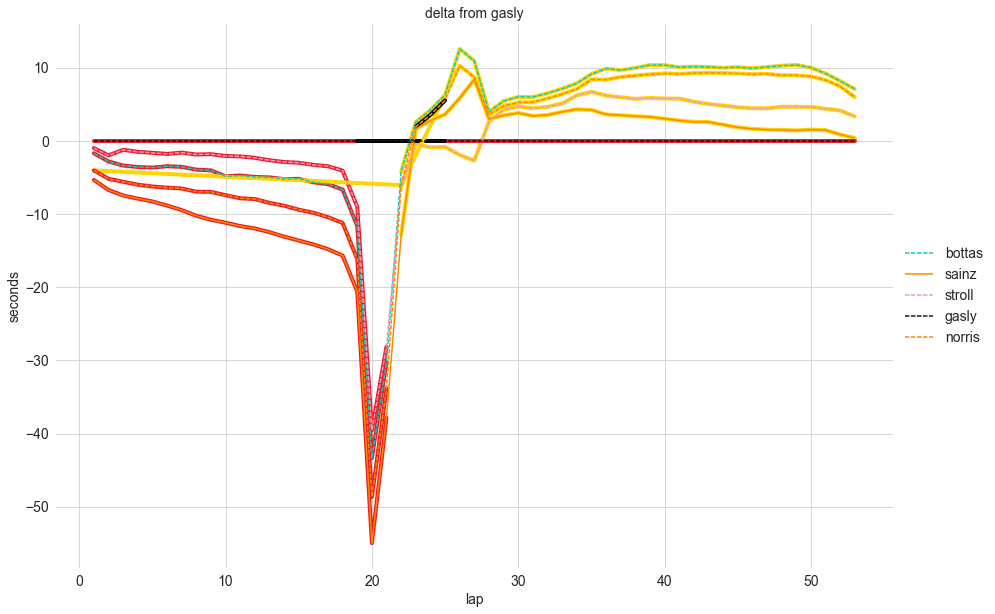

In [21]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 8), 
    tgt_driver='gasly',
    driver_refs=['stroll', 'sainz', 'gasly', 'norris', 'bottas'],
    figsize=(15,10),
    show_tyres=True
)